In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from os import chdir
from glob import glob
import pandas as pd
import glob
import os

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [133]:
path= 'C:/Users/mmall/OneDrive/Desktop/##WS 2021/MADI_4.0/ardata/8.csv'

df = pd.read_csv(path)
columns=['Sequence','x','y','z','label']
df.columns=columns
#df=df.drop(columns=['Sequence'])

df=df[df["label"] != 0] #data cleaning: Leaving out unlabeled data || (3719, 4)
print(df.shape)


(137794, 5)


In [134]:
classes= list(set(df['label']))
print(classes)

[1, 2, 3, 4, 5, 6, 7]


basic_1.png


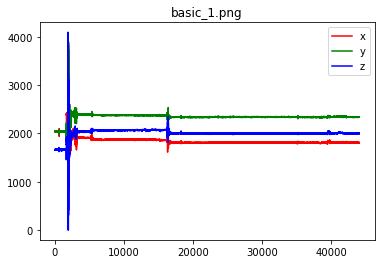

basic_2.png


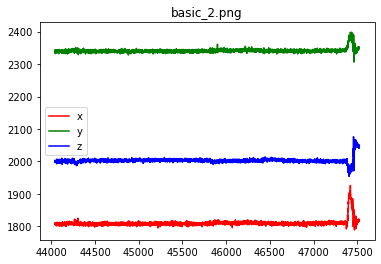

basic_3.png


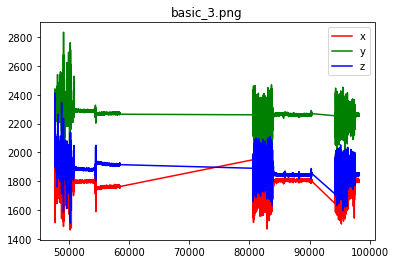

basic_4.png


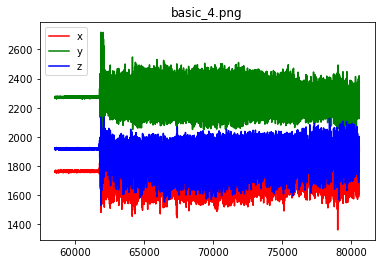

basic_5.png


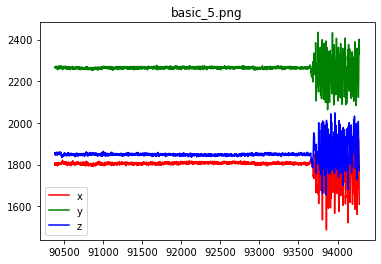

basic_6.png


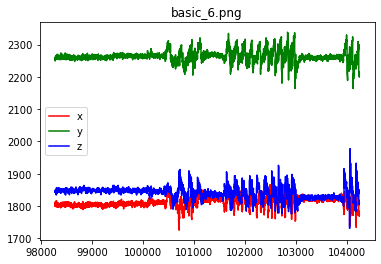

basic_7.png


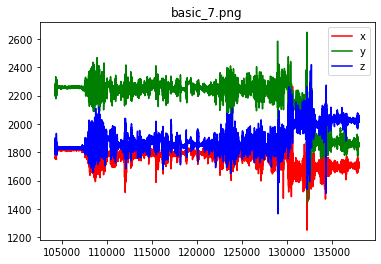

In [140]:
for cls in classes:
    df_cls = df[df['label']==cls]            
    t= df_cls.Sequence
    x= df_cls.x
    y= df_cls.y
    z= df_cls.z
    #plt.subplot(4,2,cls)
    plt.plot(t,x,'r',label='x')
    plt.plot(t,y,'g',label='y')
    plt.plot(t,z,'b', label='z')
    plt.legend()
    fig_name='basic_'+str(cls)+'.png'
    print(fig_name)
    plt.title(fig_name)
    plt.savefig(fig_name,bbox_inches='tight')
    plt.show()

df_class (44039, 5)
df_clean_class (40368, 5)


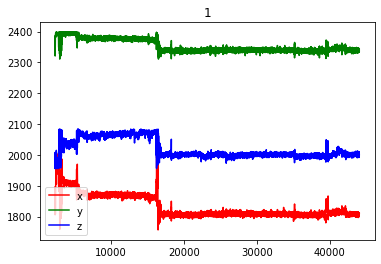

df_class (3485, 5)
df_clean_class (3293, 5)


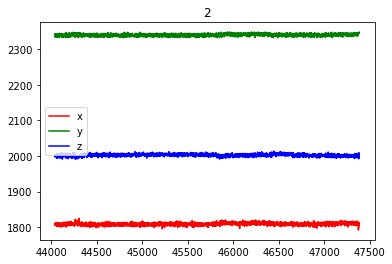

df_class (24605, 5)
df_clean_class (20191, 5)


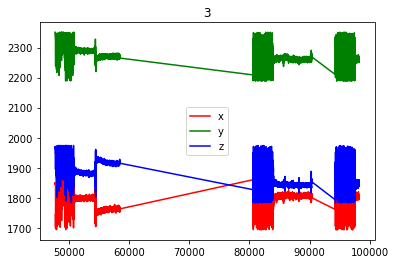

df_class (22035, 5)
df_clean_class (19553, 5)


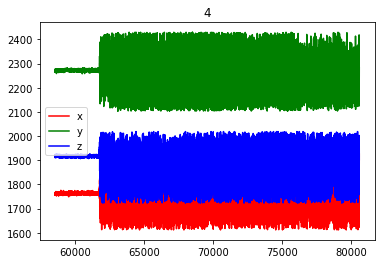

df_class (3900, 5)
df_clean_class (3337, 5)


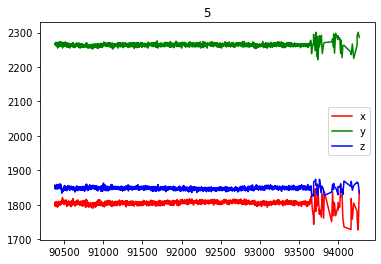

df_class (5980, 5)
df_clean_class (4911, 5)


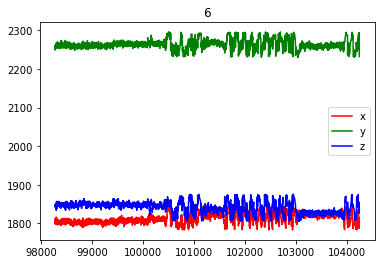

df_class (33750, 5)
df_clean_class (26206, 5)


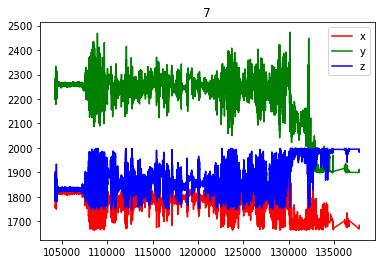

In [131]:
#Data Cleaning

df_clean =  pd.DataFrame()
for cls in classes:
    df_cls = df[df['label']==cls]
    print('df_class', df_cls.shape)
    for col in ['x', 'y', 'z']:
        col_mean = np.mean(df_cls[col])
        col_std = np.std(df_cls[col])
        mask = (df_cls[col] < col_mean+2*col_std)  & (df_cls[col] > col_mean-2*col_std)
        df_cls = df_cls.loc[mask]
    print('df_clean_class',df_cls.shape)
    pd.concat([df_clean,df_cls], ignore_index=True, sort=False)
            
    t= df_cls.Sequence
    x= df_cls.x
    y= df_cls.y
    z= df_cls.z
    plt.plot(t,x,'r',label='x')
    plt.plot(t,y,'g',label='y')
    plt.plot(t,z,'b', label='z')
    plt.legend()
    plt.title(cls)
    plt.show()
    
   

In [114]:
df1=df[df['label']==1]
df2=df[df['label']==2]
df3=df[df['label']==3]
df4=df[df['label']==4]
df5=df[df['label']==5]
df6=df[df['label']==6]
df7=df[df['label']==7]


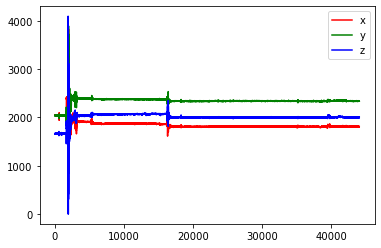

In [115]:
t=df1.Sequence
x= df1.x
y=df1.y
z=df1.z
plt.plot(t,x,'r',label='x')
plt.plot(t,y,'g',label='y')
plt.plot(t,z,'b', label='z')
plt.legend()
#print(t[10])

(3485, 5)


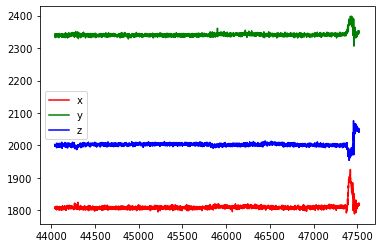

In [103]:
print(df2.shape)
t=df2.Sequence
x= df2.x
y=df2.y
z=df2.z
plt.plot(t,x,'r',label='x')
plt.plot(t,y,'g',label='y')
plt.plot(t,z,'b', label='z')
plt.legend()
#print(t[10])

In [104]:
print(df2.describe())

           Sequence            x            y            z   label
count   3485.000000  3485.000000  3485.000000  3485.000000  3485.0
mean   45782.000000  1809.970158  2341.155811  2002.865710     2.0
std     1006.177171    10.531715     6.350967     8.374027     0.0
min    44040.000000  1789.000000  2306.000000  1954.000000     2.0
25%    44911.000000  1806.000000  2338.000000  2000.000000     2.0
50%    45782.000000  1809.000000  2340.000000  2002.000000     2.0
75%    46653.000000  1811.000000  2343.000000  2005.000000     2.0
max    47524.000000  1926.000000  2398.000000  2076.000000     2.0


In [84]:
x_mean=np.mean(df2['x'])
x_std=np.std(df2['x'])
mask=(df2['x'] < x_mean+2*x_std)  & (df2['x'] > x_mean-2*x_std)
df2=df2.loc[mask]

y_mean=np.mean(df2['y'])
y_std=np.std(df2['y'])
mask=(df2['y'] < y_mean+2*y_std)  & (df2['y'] > y_mean-2*y_std)
df2=df2.loc[mask]

z_mean=np.mean(df2['z'])
z_std=np.std(df2['z'])
mask=(df2['z'] < z_mean+2*z_std)  & (df2['z'] > z_mean-2*z_std)
df2=df2.loc[mask]


(3117, 5)


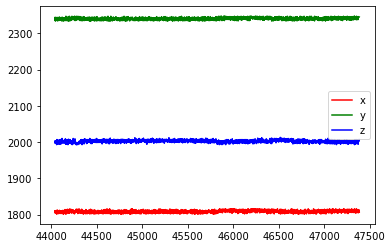

In [83]:
print(df2.shape)
t=df2.Sequence
x= df2.x
y=df2.y
z=df2.z
plt.plot(t,x,'r',label='x')
plt.plot(t,y,'g',label='y')
plt.plot(t,z,'b', label='z')
plt.legend()

In [ ]:
mask = (df['date'] > '2000-6-1') & (df['date'] <= '2000-6-10')
print(df.loc[mask])

## Data are separated by participant
Each file contains the following information
sequential number, x acceleration, y acceleration, z acceleration, label
Labels are codified by numbers

1: Working at Computer

2: Standing Up, Walking and Going updown stairs

3: Standing

4: Walking

5: Going UpDown Stairs

6: Walking and Talking with Someone

7: Talking while Standing


#### Class Distribution 

<AxesSubplot:xlabel='label', ylabel='count'>

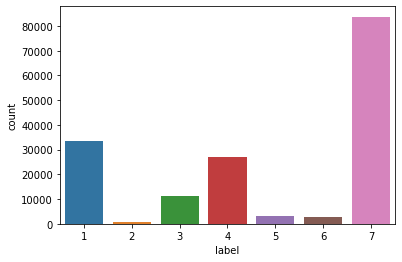

In [79]:
sns.countplot(x = 'label', data=df)

In [80]:
df.head(-5)

,x,y,z,label
0,1667,2072,2047,1
1,1611,1957,1906,1
2,1601,1939,1831,1
3,1643,1965,1879,1
4,1604,1959,1921,1
...,...,...,...,...
162489,1931,2383,2076,7
162490,1927,2383,2079,7
162491,1931,2388,2076,7
162492,1932,2383,2072,7


In [81]:
#Create input output data
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [82]:
#Over Sample
ros= RandomOverSampler(random_state=0)
ros.fit(X,y)
X_resampled, y_resampled = ros.fit_sample(X,y)
df_resample = pd.concat([X_resampled,y_resampled], axis = 1)
print(df_resample.head)
sns.countplot(x = 'label', data=df_resample)

NameError: name 'RandomOverSampler' is not defined

In [ ]:
# Split into train+val (80%) and test(20%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69) 

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=66)

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [ ]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=7)

In [ ]:
print("=== Confusion Matrix ===")
cm=confusion_matrix(y_test, rfc_predict)
print(cm)
print('\n')
cm=(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])
print(cm)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

In [ ]:
print("=== Confusion Matrix ===")
confusion_matrix=confusion_matrix(y_test, rfc_predict)
confusion_matrix=(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis])
print(confusion_matrix)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Data are separated by participant
Each file contains the following information sequential number, x acceleration, y acceleration, z acceleration, label Labels are codified by numbers

1: Working at Computer

2: Standing Up, Walking and Going updown stairs

3: Standing

4: Walking

5: Going UpDown Stairs

6: Walking and Talking with Someone

7: Talking while Standing

In [ ]:
confusion_matrix

In [ ]:
np.round(confusion_matrix,2)